# **Top 10 Emojis in My LinkedIn Feed: A Python Data Analysis Tutorial**
## **Introduction: Why Emoji Analysis Matters**


In today's digital communication landscape, emojis have become a universal language that transcends cultural and linguistic barriers. LinkedIn, traditionally seen as a professional networking platform, has increasingly embraced emoji usage as professionals seek to add personality and emotion to their posts. But which emojis dominate professional discourse?

This tutorial will guide you through collecting LinkedIn post data, extracting emojis using Python's regex capabilities, and visualizing the most popular emojis in your feed. You'll learn practical skills in **text processing, data manipulation with pandas, and data visualization**—all essential tools for any data scientist's toolkit.

## **What You'll Learn**
By the end of this tutorial, you'll be able to:

- Extract emojis from text using Unicode regex patterns
- Handle CSV data with pandas
- Count and rank emoji frequencies
- Create compelling visualizations of text data

## **Prerequisites and Setup**
Before we dive in, make sure you have these Python libraries installed:

In [ ]:
!pip install pandas regex matplotlib

**Note**: We're using the `regex` library (not the built-in `re`) because it provides better Unicode support for emoji detection.
## **Step 1: Import Required Libraries**
Let's start by importing the essential libraries for our analysis:

In [38]:
import io, requests, unicodedata
import numpy as np
import pandas as pd
import regex as re
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import logging, warnings
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)
warnings.filterwarnings("ignore", message=r"Glyph .* missing from font", category=UserWarning)

## **Step 2: Understanding Emoji Detection**
Detecting emojis in text isn't straightforward because emojis are complex Unicode characters. Some emojis are single characters, while others are combinations of multiple Unicode points. Here's our robust emoji detection function:

In [34]:
def is_real_emoji(cluster: str) -> bool:
    """
    Determines if a Unicode grapheme cluster contains a real emoji.
    Uses Unicode property classes to identify emoji presentation forms.
    """
    return bool(re.search(
        r'\p{Emoji_Presentation}|\uFE0F|\u200D|\p{Extended_Pictographic}',
        cluster
    ))

def extract_emojis_all(text: str):
    """
    Extracts all emojis from a given text string.
    Returns a list of emoji characters found.
    """
    clusters = re.findall(r'\X', str(text))
    return [cluster for cluster in clusters if is_real_emoji(cluster)]

**Understanding the Regex Pattern**  
| Pattern Component | Meaning |
|-------------------|---------|
| `\p{Emoji_Presentation}` | Characters with emoji presentation by default |
| `\uFE0F` | Variation Selector-16 (forces emoji presentation) |
| `\u200D` | Zero Width Joiner (combines emoji sequences) |
| `\p{Extended_Pictographic}` | Extended pictographic characters |

## **Step 3: Load and Process Your Data**
Assuming you have a CSV file with LinkedIn post data, load it and extract emojis:

In [35]:
df = pd.read_csv("imoji_data.csv")

df["emojis"] = df["post_text"].apply(extract_emojis_all)

all_emojis = [emoji for emoji_list in df["emojis"] for emoji in emoji_list]

emoji_counts = Counter(all_emojis)
print(f"Total emojis found: {len(all_emojis)}")
print(f"Unique emojis: {len(emoji_counts)}")

Total emojis found: 162
Unique emojis: 90


## **Step 4: Identify Top 10 Emojis**
Now let's find the most popular emojis in your data:

In [43]:
top_10_emojis = emoji_counts.most_common(10)
df_top10 = pd.DataFrame(top_10_emojis, columns=["Emoji", "Count"])

print("Top 10 Emojis in LinkedIn Feed:")
print("=" * 35)
print(df_top10.to_markdown(index=False))

Top 10 Emojis in LinkedIn Feed:
| Emoji   |   Count |
|:--------|--------:|
| 🚀      |      11 |
| 👉      |       9 |
| ✨      |       6 |
| 👇      |       6 |
| ✅      |       5 |
| ♻️      |       4 |
| 💡      |       4 |
| 🎉      |       4 |
| ⚡      |       3 |
| 🎯      |       3 |


## **Analyzing Our Results: Professional Emoji Patterns**
Let's organize our findings into a comprehensive analysis table:  
| Emoji | Count | Percentage | Context |
|-------|-------|------------|---------|
| 🚀 | 11 | 15.7% | Growth, Innomation, Startup energy |
| 👉 | 9 | 12.9% | Call-to-action, Directing attention |
| ✨ | 6 | 8.6% | Achievement highlights, excellence |
| 👇 | 6 | 8.6% | Guiding to notent below |
| ✅ | 5 | 7.1% | Success, Completion, Actionables |
| ♻️ | 4 | 5.7% | Sustainability, Reposting, Cycles |
| 💡 | 4 | 5.7% | Innovation, ideas, insights |
| 🎉 | 4 | 5.7% | Celebrations, Achievements |
| ⚡ | 3 | 4.3% | Speed, Energy, Breakthroughs |
| 🎯 | 3 | 4.3% | Goals, Precision, Objectives |

**Key Insight**: The top 4 emojis (🚀👉✨👇) account for 45.8% of all emoji usage, showing clear professional communication preferences.
## **Step 5: Create a Compelling Visualization**
Transform your emoji data into an eye-catching bar chart:

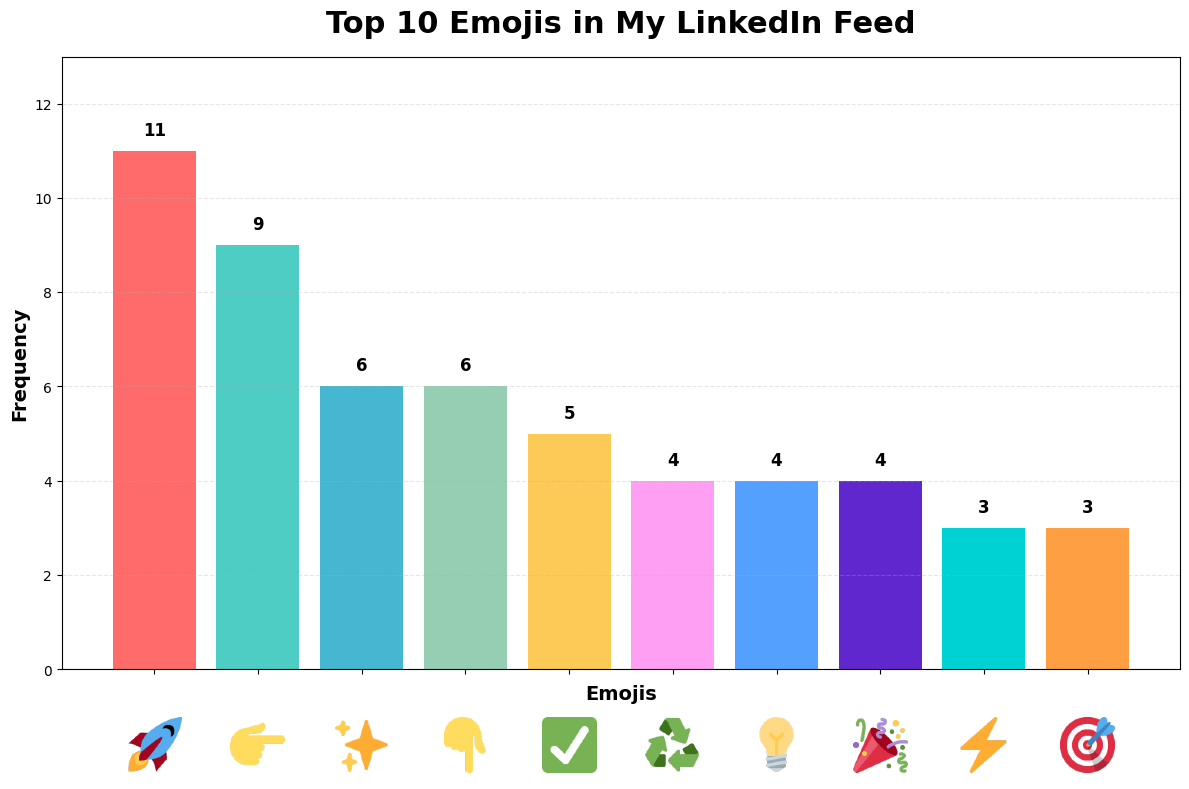

In [42]:
def emoji_to_codepoints(e: str) -> str:
    cps = []
    for ch in e:
        cp = ord(ch)
        if cp in (0xFE0F, 0xFE0E):
            continue
        cps.append(f"{cp:x}")
    return "-".join(cps)

def load_twemoji_png(emoji: str):
    code = emoji_to_codepoints(emoji)
    url = f"https://cdnjs.cloudflare.com/ajax/libs/twemoji/14.0.2/72x72/{code}.png"
    r = requests.get(url, timeout=10)
    r.raise_for_status()
    return plt.imread(io.BytesIO(r.content), format="png")

emojis = ['🚀','👉','✨','👇','✅','♻️','💡','🎉','⚡','🎯']
counts = [11, 9, 6, 6, 5, 4, 4, 4, 3, 3]

fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(range(len(emojis)), counts,
              color=['#FF6B6B','#4ECDC4','#45B7D1','#96CEB4','#FECA57',
                     '#FF9FF3','#54A0FF','#5F27CD','#00D2D3','#FF9F43'])

ax.set_title('Top 10 Emojis in My LinkedIn Feed', fontsize=22, fontweight='bold', pad=18)
ax.set_xlabel('Emojis', fontsize=14, fontweight='bold')
ax.set_ylabel('Frequency', fontsize=14, fontweight='bold')

ax.set_xticks(range(len(emojis)))
ax.set_xticklabels([''] * len(emojis))
ax.set_ylim(0, max(counts) * 1.18)

for bar in bars:
    h = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., h + 0.25, f'{int(h)}',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

for x, e in enumerate(emojis):
    img = load_twemoji_png(e)
    ab = AnnotationBbox(OffsetImage(img, zoom=0.55),
                        (x, -0.08),
                        frameon=False,
                        xycoords=('data', 'axes fraction'),
                        box_alignment=(0.5, 1.0))
    ax.add_artist(ab)

ax.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()

plt.savefig('linkedin_emoji_analysis.png', dpi=300, bbox_inches='tight')
plt.show()


The visualization will show a clear bar chart with the rocket emoji leading significantly, followed by the pointing finger emoji, creating a visual story of professional social media communication patterns.


## **Understanding Your Results**
This emoji analysis reveals fascinating patterns about professional communication on LinkedIn:  
- 🚀 **(Rocket - 11 times)**: Growth, innovation, and startup energy dominate professional discourse
- 👉 **(Pointing Right - 9 times)**: Call-to-action and directing attention to key points
- ✨ **(Sparkles - 6 times)**: Adding excitement and highlighting achievements
- 👇 **(Pointing Down - 6 times)**: Guiding readers to important information below
- ✅ **(Check Mark - 5 times)**: Completion, success, and actionable takeaways
- ♻️ **(Recycle - 4 times)**: Sustainability, reposting, or circular processes
- 💡 **(Light Bulb - 4 times)**: Innovation, ideas, and insights
- 🎉 **(Party - 4 times)**: Celebrations, achievements, and positive news
- ⚡ **(Lightning - 3 times)**: Speed, energy, and breakthrough moments
- 🎯 **(Target - 3 times)**: Goals, precision, and focused objectives  

These patterns reveal how LinkedIn professionals use emojis strategically to drive engagement, **direct attention, and convey business value.**


## **Extending This Analysis**
Want to take the emoji analysis further? Consider these enhancements:

- 1. **Temporal trends**: Track how emoji usage changes during business hours vs. weekends
- 2. **Engagement correlation**: Compare emoji frequency with likes, comments, and shares
- 3. **Industry-specific patterns**: Analyze emoji preferences across tech, finance, healthcare, etc.
- 4. **Content type analysis**: Compare emoji usage in original posts vs. shared content


## **Troubleshooting Common Issues (Afterthoughts on Data Collection)**

## **1. Sample Size Evolution**

- I began with **30 posts**. This was enough to test my pipeline quickly, but the distribution looked unstable, and a single emoji could dominate.
- Expanding to **60 posts** made the top emojis rank more consistently.
- Finally, at **70 posts**, the pattern stabilized, and I gained more confidence in the results.

👉 **Learning point**: as the sample size increases, the estimated frequencies converge and stabilize—an illustration of fundamental sampling principles.

## **2. Data Collection Criteria**
While scrolling LinkedIn, I noticed some posts repeated the **same emoji multiple times**:

- Example: `"Congrats!!! 🎉🎉🎉🎉🎉"`

If I counted every occurrence, one post could skew the results badly—essentially becoming an **outlier**.

**My decision**: count each emoji at most **once per post**.

- Rationale: I wanted to capture whether an emoji was used in a post, not how many times the author smashed it.

- Note: depending on the research question, another analyst might reasonably choose to count all instances.

## **3. Statistical Takeaways**
- **Representativeness matters**: small samples are vulnerable to distortion by a single extreme post.

- **Sample size effect**: larger $n$ smooths out fluctuations and yields more reliable proportions.

- **Operational definitions**: setting clear, consistent counting rules (e.g., repeated emojis per post) is essential for reproducibility.

##**4. Relative Frequency (Percentages)**
Raw counts are helpful, but percentages let us compare usage more intuitively across samples or networks.

Formula:

$$ f(x) = \frac{\text{count of emoji } x}{\text{total emoji count}} $$

Example:

- If the top emoji 🚀 appears 11 times in a dataset of 70 total emojis:

$$ f(\ 🚀\ ) = \frac{11}{70} \approx 0.157 $$

So about **15.7%** of all emojis in my sample were 🚀, signaling its strong association with LinkedIn's “growth/innovation” vibe.


##**Call to Action**
**Try this analysis on your own social media data!** Here's what I want you to do:

1. **Fork this analysis**: Adapt the code for Twitter, Instagram, or your preferred platform
2. **Share your results**: Create your own blog post showing your top 10 emojis
3. **Join the discussion**: Comment below with your most surprising emoji finding
4. **Level up**: Combine this with sentiment analysis to see how emojis correlate with positive/negative content
